In [41]:
%matplotlib inline

from math import *
import matplotlib
import numpy as np
import matplotlib.transforms as transforms
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pylab
from scipy import interpolate
import os

from classy import Class


params_lcdm = {
    'output':'lCl,tCl,dTk,vTk,mPk',
    'P_k_max_h/Mpc':10,
    'lensing':'y',
    'write background':'y',
    'input_verbose':10,
    'background_verbose':10,
    #'Omega_b' : 0.0486,
    #'Omega_cdm':0.2589,
    'omega_b':0.02222,
    'omega_cdm':0.1197,
    'H0':67.556,
    'z_pk':100,
    #'h':0.6731,
    'N_eff':3.13,
    'YHe':0.252,
    'z_reio':9.9,
    'A_s':2.198e-9,
    'n_s':0.9655,
    'non linear':'halofit'
    #'gauge':'synchronous',
    #'extra_metric_transfer_functions':'yes'
}

l_max_scalars = 2500

params_fe3 = {
    'output':'lCl,tCl,dTk,vTk,mPk',
    'P_k_max_h/Mpc':10,
    'lensing':'y',
    'l_max_scalars':l_max_scalars,
    'write background':'y',
    'gravity_model':'quintessence_extended',
    'parameters_smg':' 1,1.0,0.1,1.,1e-20,0',
    'Omega_Lambda' : 0.,
    'Omega_fld' : 0.,
    'Omega_smg' : -1,
    #'hubble_evolution':'false',
    'input_verbose':10,
    'background_verbose':10,
    'tuning_index_smg': 1,
    'tuning_dxdy_guess_smg': 1,
    #'Omega_b' : 0.0486,
    #'Omega_cdm':0.2589,
    'omega_b':0.02222,
    'omega_cdm':0.1197,
    'H0':67.556,
    'z_pk':100,
    #'h':0.6731,
    'N_eff':3.13,
    'YHe':0.252,
    'z_reio':9.9,
    'A_s':2.198e-9,
    'n_s':0.9655,
    'non linear':'halofit'
    #'gauge':'synchronous',
    #'extra_metric_transfer_functions':'yes'
}

k = 1e-4*np.array(range(1,60001))
l = np.array(range(2,l_max_scalars+1))
factor = l*(l+1)/(2*np.pi)
ll = np.array(range(2,2501))
factorl = ll*(ll+1)/(2*np.pi)

cosmo = Class()

cosmo.set(params_fe3)
cosmo.compute()

bkg_fe3=cosmo.get_background()
#print(bkg_fe3.viewkeys())
print(cosmo.age())

prtt_fe3=cosmo.get_perturbations()
#print(prtt_fe.viewkeys())
#prt_fe=prtt_fe['scalar']
#prt_fe0=prt_fe[0]
#prt_fe1=prt_fe[1]
#print(prt_fe[0].viewkeys())

raw_cl3 = cosmo.raw_cl(l_max_scalars)
#raw_cl2.viewkeys()

lensed_cl3 = cosmo.lensed_cl(2500)
#lensed_cl3.viewkeys()

PK3=np.zeros(60000)
for i in range (0,59999):
    PK3[i]=cosmo.pk(k[i],0)









cosmo2 = Class()

cosmo2.set(params_lcdm)
cosmo2.compute()

bkg_lcdm=cosmo2.get_background()
print("LCDM: " + str(cosmo2.age()))

PK_lcdm=np.zeros(60000)
for i in range (0,59999):
    PK_lcdm[i]=cosmo2.pk(k[i],0)

prtt_lcdm=cosmo2.get_perturbations()
#print(prtt.viewkeys())
#prt_lcdm=prtt_lcdm['scalar']
#prt_lcdm0=prt_lcdm[0]
#prt_lcdm1=prt_lcdm[1]
#print(prt[0].viewkeys())

raw_cl_lcdm = cosmo2.raw_cl(l_max_scalars)
lensed_cl_lcdm = cosmo2.lensed_cl(2500)

12.89386444768017
LCDM: 13.808712383316225


In [35]:
cosmo2.get_transfer(z=100).keys()
cosmo2.get_pk_cb(1,100)

TypeError: get_pk_cb() takes exactly 5 positional arguments (2 given)

/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_61504/1543804049.py:18: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axarr.set_ylim(0,2)


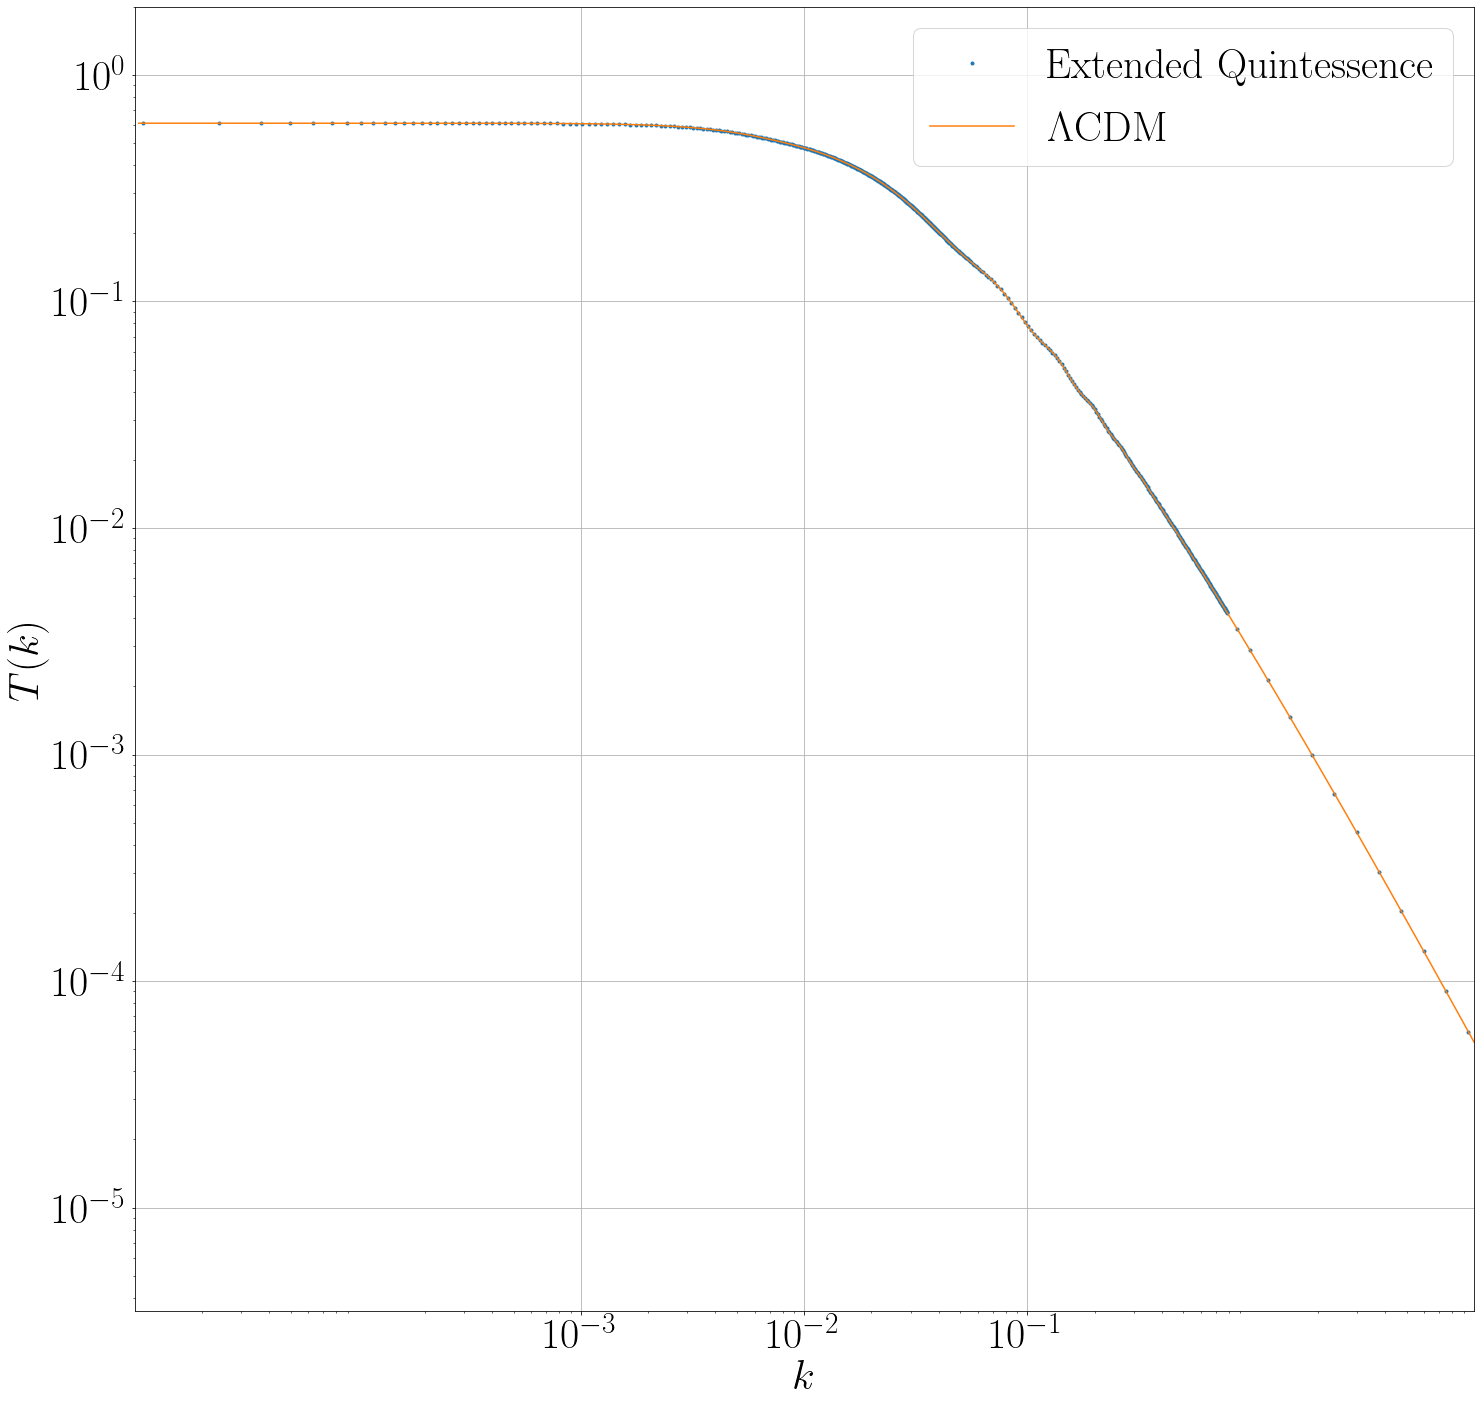

In [29]:
text_size=42
fig_size_x=24
fig_size_y=24

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)


f,axarr = plt.subplots(1,1,sharey=False, sharex=False,figsize=(fig_size_x,fig_size_y), facecolor='w')

axarr.loglog(cosmo.get_transfer(z=100)['k (h/Mpc)'],cosmo.get_transfer(z=100)['phi'],'.',label='Extended Quintessence')
axarr.loglog(cosmo2.get_transfer(z=100)['k (h/Mpc)'],cosmo2.get_transfer(z=100)['phi'],label='$\Lambda$CDM')
#plt.xlim(-10,0)
axarr.set_ylim(0,2)
axarr.set_xlim(1e-5,10)
axarr.legend()
#plt.title("$k=0.1$")
axarr.set_ylabel("$T(k)$")
axarr.set_xlabel("$k$")

axarr.grid(True)

customticks2=[1e-3,1e-2,1e-1]
axarr.set_xticks(customticks2)

f.subplots_adjust(wspace=0)
f.subplots_adjust(hspace=0)

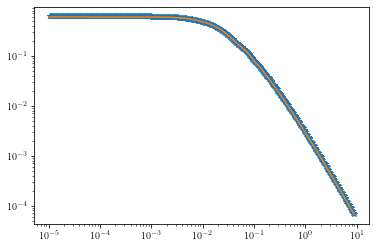

In [48]:
import numpy as np

data = np.genfromtxt('/Users/alessandrocasalino/Software/CLion/EQ_hi_class/output/hiclass_z3_tk.dat').T

plt.loglog(data[0],data[8],'*',)
plt.loglog(data[0],data[9])

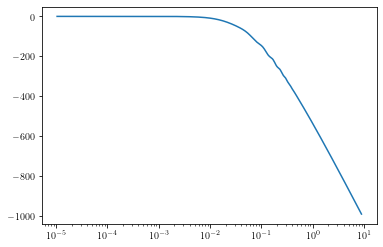

In [56]:
import numpy as np

data = np.genfromtxt('/Users/alessandrocasalino/Software/CLion/EQ_hi_class/output/hiclass_z3_tk.dat').T

plt.semilogx(data[0],data[7])